
#### Objetivo
Se predecir la nota de examen **(exam_score)** utilizando 10 variables numericas independientes 

### Principal
- Importar pandas para poder leer el dataset
- Imprimir cuantas columnas y filas tiene el DS
- ver las primeras 10 filas


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('data/enhanced_student_habits_performance_dataset.csv')
print("Forma del dataset:", df.shape)
df.head(10)

Forma del dataset: (80000, 31)


,student_id,age,gender,major,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,...,screen_time,study_environment,access_to_tutoring,family_income_range,parental_support_level,motivation_level,exam_anxiety_score,learning_style,time_management_score,exam_score
0,100000,26,Male,Computer Science,7.645367,3.0,0.1,Yes,70.3,6.2,...,10.9,Co-Learning Group,Yes,High,9,7,8,Reading,3.0,100
1,100001,28,Male,Arts,5.700000,0.5,0.4,No,88.4,7.2,...,8.3,Co-Learning Group,Yes,Low,7,2,10,Reading,6.0,99
2,100002,17,Male,Arts,2.400000,4.2,0.7,No,82.1,9.2,...,8.0,Library,Yes,High,3,9,6,Kinesthetic,7.6,98
3,100003,27,Other,Psychology,3.400000,4.6,2.3,Yes,79.3,4.2,...,11.7,Co-Learning Group,Yes,Low,5,3,10,Reading,3.2,100
4,100004,25,Female,Business,4.700000,0.8,2.7,Yes,62.9,6.5,...,9.4,Quiet Room,Yes,Medium,9,1,10,Reading,7.1,98
5,100005,17,Female,Engineering,4.200000,0.5,2.5,No,49.2,9.2,...,8.9,Quiet Room,No,High,1,10,5,Visual,3.9,94
6,100006,19,Male,Psychology,4.100000,2.4,2.2,Yes,97.9,8.5,...,9.2,Dorm,Yes,High,5,7,8,Kinesthetic,10.0,97
7,100007,17,Male,Psychology,4.100000,3.2,0.9,No,44.3,7.4,...,10.0,Co-Learning Group,Yes,Low,9,3,10,Kinesthetic,7.5,84
8,100008,28,Female,Psychology,0.600000,0.3,2.6,Yes,64.2,7.6,...,4.8,Library,No,Low,4,4,10,Kinesthetic,5.8,70
9,100009,19,Male,Engineering,5.200000,1.1,1.6,Yes,40.1,7.2,...,8.0,Cafe,Yes,Medium,7,9,6,Auditory,7.0,100


**Se escoge 10 variables numericas como independientes y 1 variable dependiente**

| ``study_hours_per_day``    | Horas de estudio por día       |
| -------------------------- | ------------------------------ |
| ``social_media_hours``     | Horas en redes sociales        |
| ``netflix_hours``          | Horas viendo Netflix           |
| ``attendance_percentage``  | Porcentaje de asistencia       |
| ``sleep_hours``            | Horas promedio de sueño        |
| ``exercise_frequency``     | Frecuencia de ejercicio físico |
| ``stress_level``           | Nivel de estrés (numérico)     |
| ``screen_time``            | Tiempo frente a pantallas      |
| ``parental_support_level`` | Apoyo de los padres            |
| ``time_management_score``  | Puntaje en manejo del tiempo\| |

##### Dependiente
``exam_score`` ---->  nota final


In [29]:
#dep
X = df[['study_hours_per_day',   #hrs de estudio por dia
        'social_media_hours',   #hrs en redes sociales
        'netflix_hours',       #hrs en Netflix
        'attendance_percentage',#asistencia
        'sleep_hours',         #hrs de sueño
        'exercise_frequency',  #frecuencia de ejercicio
        'stress_level',       #nivel de estrés
        'screen_time',        #tiempo de pantalla
        'parental_support_level', #nivel de apoyo parental
        'time_management_score']] #puntaje de gestión del tiempo

#Ind
y = df['exam_score']
print("X shape:", X.shape)
print("Y shape:", y.shape)
X.head(10)

X shape: (80000, 10)
Y shape: (80000,)


,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,stress_level,screen_time,parental_support_level,time_management_score
0,7.645367,3.0,0.1,70.3,6.2,3,5.8,10.9,9,3.0
1,5.700000,0.5,0.4,88.4,7.2,4,5.8,8.3,7,6.0
2,2.400000,4.2,0.7,82.1,9.2,4,8.0,8.0,3,7.6
3,3.400000,4.6,2.3,79.3,4.2,3,4.6,11.7,5,3.2
4,4.700000,0.8,2.7,62.9,6.5,6,5.7,9.4,9,7.1
5,4.200000,0.5,2.5,49.2,9.2,3,1.5,8.9,1,3.9
6,4.100000,2.4,2.2,97.9,8.5,6,2.5,9.2,5,10.0
7,4.100000,3.2,0.9,44.3,7.4,5,5.3,10.0,9,7.5
8,0.600000,0.3,2.6,64.2,7.6,0,4.0,4.8,4,5.8
9,5.200000,1.1,1.6,40.1,7.2,6,3.3,8.0,7,7.0


#### Division de datos en Train y Test
- **20% Train**
- **80% Test**

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (32000, 10)
Tamaño del conjunto de prueba: (48000, 10)


### Entrenamiento del modelo
Usando  Regresion lineal con la libreria Scikit-learn

In [31]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Intersección (theta_0):", modelo.intercept_)
print("Coeficientes (theta_1 a theta_n):")
for var, coef in zip(X.columns, modelo.coef_):
    print(f"{var}: {coef}")


Intersección (theta_0): 79.81224519164768
Coeficientes (theta_1 a theta_n):
study_hours_per_day: 1.5900127166286453
social_media_hours: 0.09854845079391203
netflix_hours: 0.1625295809228763
attendance_percentage: 0.003227503023053034
sleep_hours: 0.7820589660199114
exercise_frequency: 0.44644569670216694
stress_level: -0.6777714956804896
screen_time: -0.18072564179003936
parental_support_level: -0.02989677413504258
time_management_score: 0.026982969065495386


#### Predicciones

In [32]:

y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE):", mse)

rmse = np.sqrt(mse)
print("Raíz del error cuadrático medio (RMSE):", rmse)

r2 = r2_score(y_test, y_pred)
print("R² (coeficiente de determinación):", r2)


Error cuadrático medio (MSE): 122.70694421706828
Raíz del error cuadrático medio (RMSE): 11.077316652378784
R² (coeficiente de determinación): 0.08594797864915882


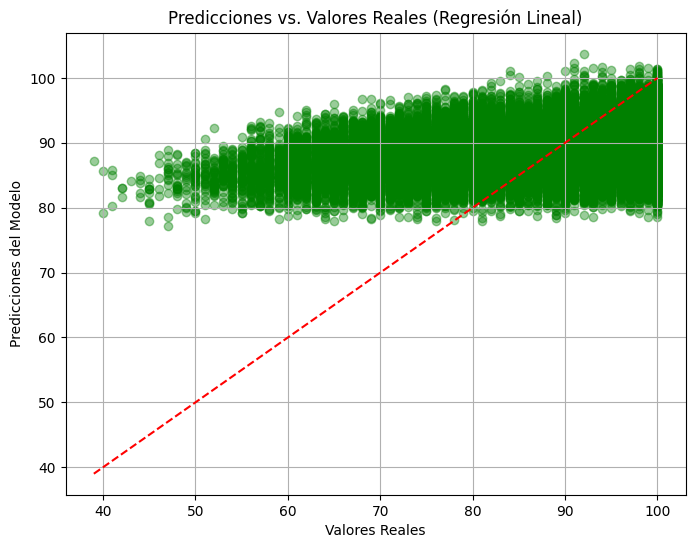

In [33]:
# Paso 6: Gráfica de comparación entre y_test y y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # línea ideal
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones del Modelo')
plt.title('Predicciones vs. Valores Reales (Regresión Lineal)')
plt.grid(True)
plt.show()
